## Final Project Submission

Please fill out:
* Student name: Mindy Jen
* Student pace: full time
* Scheduled project review date/time: Aug. 27th, 2020/4:00-4:45 (CDT)
* Instructor name: Yish Lim
* Blog post URL: in progress
* data (too big to be operative)
    * 2020 April - 2020 Aug 9th     (IL stay-at-home order for COVID-19 starts taking effect)
    * 2020 Mar ----------------     (pandemic arose)
    * 2019 Dec - 2020 Feb           (Holiday season)
    * 2019 Sep - 2019 Nov           (Fall)
    * 2019 Jun - 2019 Aug           (Summer)
    * 2019 Mar - 2019 May           (Spring)

## Import the necessary libraries

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
dfcovid = pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalMODEL.csv')
dfcovid.head()

,index,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,UNIT_TYPE,MAKE,...,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,FATAL_DEGREE,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE,DAMAGE_COST,FATAL_COND
0,53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,14,...,4,4,2020,1.0,0,1,1,1,2,4
1,54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,17,...,4,4,2020,1.0,0,1,1,1,2,4
2,55,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,14,...,4,4,2020,1.0,0,1,1,1,2,4
3,56,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,17,...,4,4,2020,1.0,0,1,1,1,2,4
4,176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,1,9,...,5,4,2020,0.0,0,1,1,1,1,3


In [3]:
#dfcovid.drop(['Unnamed: 0'], axis=1, inplace=True)
dfcovid.set_index('index', inplace=True)
dfcovid.head()

,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,UNIT_TYPE,MAKE,MODEL,...,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,FATAL_DEGREE,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE,DAMAGE_COST,FATAL_COND
index,,,,,,,,,,,,,,,,,,,,,
53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,14,101,...,4,4,2020,1.0,0,1,1,1,2,4
54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,17,65,...,4,4,2020,1.0,0,1,1,1,2,4
55,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,14,101,...,4,4,2020,1.0,0,1,1,1,2,4
56,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,17,65,...,4,4,2020,1.0,0,1,1,1,2,4
176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,1,9,37,...,5,4,2020,0.0,0,1,1,1,1,3


In [4]:
dfcovid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2870 entries, 53 to 140632
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    2870 non-null   object 
 1   STATE                   2870 non-null   object 
 2   ZIPCODE                 2870 non-null   int64  
 3   AGE                     2870 non-null   float64
 4   EJECTION                2870 non-null   float64
 5   DRIVER_ACTION           2870 non-null   float64
 6   BAC_RESULT              2870 non-null   float64
 7   UNIT_TYPE               2870 non-null   int64  
 8   MAKE                    2870 non-null   int64  
 9   MODEL                   2870 non-null   int64  
 10  VEHICLE_YEAR            2870 non-null   float64
 11  VEHICLE_TYPE            2870 non-null   int64  
 12  TRAVEL_DIRECTION        2870 non-null   int64  
 13  MANEUVER                2870 non-null   int64  
 14  FIRST_CONTACT_POINT     2870 non-null

In [5]:
dfcovid.drop(['CITY','STATE','MAKE','MODEL'],axis=1,inplace=True)
dfcovid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2870 entries, 53 to 140632
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZIPCODE                 2870 non-null   int64  
 1   AGE                     2870 non-null   float64
 2   EJECTION                2870 non-null   float64
 3   DRIVER_ACTION           2870 non-null   float64
 4   BAC_RESULT              2870 non-null   float64
 5   UNIT_TYPE               2870 non-null   int64  
 6   VEHICLE_YEAR            2870 non-null   float64
 7   VEHICLE_TYPE            2870 non-null   int64  
 8   TRAVEL_DIRECTION        2870 non-null   int64  
 9   MANEUVER                2870 non-null   int64  
 10  FIRST_CONTACT_POINT     2870 non-null   float64
 11  POSTED_SPEED_LIMIT      2870 non-null   int64  
 12  TRAFFIC_CONTROL_DEVICE  2870 non-null   int64  
 13  DEVICE_CONDITION        2870 non-null   int64  
 14  WEATHER_CONDITION       2870 non-null

In [6]:
dfcovid.to_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_final2MODEL.csv')


   * LIGHTING_CONDITION
   * FIRST_CRASH_TYPE
   * STREET_DIRECTION
   * ALIGNMENT
   * ROADWAY_SURFACE_COND
   * WEATHER_CONDITION
   * TRAVEL_DIRECTION
   * INTERSECTION_RELATED
   * MANEUVER
   * HIT_AND_RUN
   * VEHICLE_TYPE
   * UNIT_TYPE
   * TRAFFIC_CONTROL_DEVICE
   * FIRST_CONTACT_POINT
   * BAC_RESULT

In [7]:
cate_cols = ['LIGHTING_CONDITION','FIRST_CRASH_TYPE','STREET_DIRECTION','ALIGNMENT','ROADWAY_SURFACE_COND',
             'WEATHER_CONDITION','TRAVEL_DIRECTION','INTERSECTION_RELATED','TRAFFIC_CONTROL_DEVICE',
             'FIRST_CONTACT_POINT','MANEUVER','HIT_AND_RUN','VEHICLE_TYPE','UNIT_TYPE','FATAL_COND','DAMAGE_COST',
             'BAC_RESULT','SEX','FATAL_DEGREE']
cont_cols = ['ZIPCODE','AGE','VEHICLE_YEAR','POSTED_SPEED_LIMIT','NUM_UNITS','CRASH_HOUR','CRASH_DAY_OF_WEEK',
             'CRASH_MONTH','CRASH_YEAR']

In [8]:
cate_dfcovid = dfcovid[cate_cols]
for col in cate_dfcovid.columns:
    cate_dfcovid[col] = cate_dfcovid[col].astype('int64')
cate_dfcovid.head()

,LIGHTING_CONDITION,FIRST_CRASH_TYPE,STREET_DIRECTION,ALIGNMENT,ROADWAY_SURFACE_COND,WEATHER_CONDITION,TRAVEL_DIRECTION,INTERSECTION_RELATED,TRAFFIC_CONTROL_DEVICE,FIRST_CONTACT_POINT,MANEUVER,HIT_AND_RUN,VEHICLE_TYPE,UNIT_TYPE,FATAL_COND,DAMAGE_COST,BAC_RESULT,SEX,FATAL_DEGREE
index,,,,,,,,,,,,,,,,,,,
53,2,2,3,1,1,1,3,1,1,1,-1,1,-1,1,4,2,0,0,1
54,2,2,3,1,1,1,2,1,1,3,2,1,1,1,4,2,0,0,1
55,2,2,3,1,1,1,3,1,1,1,-1,1,-1,1,4,2,0,0,1
56,2,2,3,1,1,1,2,1,1,3,2,1,1,1,4,2,0,0,1
176,1,7,4,1,1,1,2,1,2,7,1,1,1,1,3,1,0,0,0


In [9]:
cont_dfcovid = dfcovid[cont_cols]
cont_dfcovid.head()

,ZIPCODE,AGE,VEHICLE_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR
index,,,,,,,,,
53,60647,23.0,2010.0,30,2,20,4,4,2020
54,60647,23.0,2004.0,30,2,20,4,4,2020
55,60647,36.0,2010.0,30,2,20,4,4,2020
56,60647,36.0,2004.0,30,2,20,4,4,2020
176,60617,47.0,2009.0,25,2,17,5,4,2020


ohe = OneHotEncoder()

ohe.fit(cate_dfcovid)

ohe_cate_arcovid = ohe.transform(cate_dfcovid).toarray()

ohe_cate_dfcovid = pd.DataFrame(ohe_cate_arcovid, columns=ohe.get_feature_names(cate_dfcovid.columns))

ohe_cate_dfcovid.head()

In [10]:
comb_dfcovid = pd.concat([cate_dfcovid,cont_dfcovid],axis=1)
print(comb_dfcovid.shape)

(2870, 28)


In [11]:
comb_dfcovid.head()

,LIGHTING_CONDITION,FIRST_CRASH_TYPE,STREET_DIRECTION,ALIGNMENT,ROADWAY_SURFACE_COND,WEATHER_CONDITION,TRAVEL_DIRECTION,INTERSECTION_RELATED,TRAFFIC_CONTROL_DEVICE,FIRST_CONTACT_POINT,...,FATAL_DEGREE,ZIPCODE,AGE,VEHICLE_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR
index,,,,,,,,,,,,,,,,,,,,,
53,2,2,3,1,1,1,3,1,1,1,...,1,60647,23.0,2010.0,30,2,20,4,4,2020
54,2,2,3,1,1,1,2,1,1,3,...,1,60647,23.0,2004.0,30,2,20,4,4,2020
55,2,2,3,1,1,1,3,1,1,1,...,1,60647,36.0,2010.0,30,2,20,4,4,2020
56,2,2,3,1,1,1,2,1,1,3,...,1,60647,36.0,2004.0,30,2,20,4,4,2020
176,1,7,4,1,1,1,2,1,2,7,...,0,60617,47.0,2009.0,25,2,17,5,4,2020


In [12]:
comb_dfcovid.isna().sum()

LIGHTING_CONDITION        0
FIRST_CRASH_TYPE          0
STREET_DIRECTION          0
ALIGNMENT                 0
ROADWAY_SURFACE_COND      0
WEATHER_CONDITION         0
TRAVEL_DIRECTION          0
INTERSECTION_RELATED      0
TRAFFIC_CONTROL_DEVICE    0
FIRST_CONTACT_POINT       0
MANEUVER                  0
HIT_AND_RUN               0
VEHICLE_TYPE              0
UNIT_TYPE                 0
FATAL_COND                0
DAMAGE_COST               0
BAC_RESULT                0
SEX                       0
FATAL_DEGREE              0
ZIPCODE                   0
AGE                       0
VEHICLE_YEAR              0
POSTED_SPEED_LIMIT        0
NUM_UNITS                 0
CRASH_HOUR                0
CRASH_DAY_OF_WEEK         0
CRASH_MONTH               0
CRASH_YEAR                0
dtype: int64

In [13]:
comb_dfcovid.to_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_final2DTMODEL.csv')

## Create features, labels, training, and test data

In [14]:
y = comb_dfcovid['FATAL_DEGREE']
y_label = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y_label.shape[1]
print(n_classes,'\n')
X = comb_dfcovid.drop(['FATAL_DEGREE'],axis=1)
categoricals = list(col for col in cate_cols if col != 'FATAL_DEGREE')
X_df = pd.get_dummies(X, columns=categoricals)
print(X_df.shape,'\n')
print(X_df.columns,'\n')
X_df.head()

4 

(2870, 128) 

Index(['ZIPCODE', 'AGE', 'VEHICLE_YEAR', 'POSTED_SPEED_LIMIT', 'NUM_UNITS',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CRASH_YEAR',
       'LIGHTING_CONDITION_-1',
       ...
       'FATAL_COND_4', 'DAMAGE_COST_1', 'DAMAGE_COST_2', 'DAMAGE_COST_3',
       'BAC_RESULT_-1', 'BAC_RESULT_0', 'BAC_RESULT_1', 'BAC_RESULT_2',
       'SEX_0', 'SEX_1'],
      dtype='object', length=128) 



,ZIPCODE,AGE,VEHICLE_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,LIGHTING_CONDITION_-1,...,FATAL_COND_4,DAMAGE_COST_1,DAMAGE_COST_2,DAMAGE_COST_3,BAC_RESULT_-1,BAC_RESULT_0,BAC_RESULT_1,BAC_RESULT_2,SEX_0,SEX_1
index,,,,,,,,,,,,,,,,,,,,,
53,60647,23.0,2010.0,30,2,20,4,4,2020,0,...,1,0,1,0,0,1,0,0,1,0
54,60647,23.0,2004.0,30,2,20,4,4,2020,0,...,1,0,1,0,0,1,0,0,1,0
55,60647,36.0,2010.0,30,2,20,4,4,2020,0,...,1,0,1,0,0,1,0,0,1,0
56,60647,36.0,2004.0,30,2,20,4,4,2020,0,...,1,0,1,0,0,1,0,0,1,0
176,60617,47.0,2009.0,25,2,17,5,4,2020,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
def drop_nanCols(df):
    df_clone = df.copy()
    
    for cate in cate_cols:
        if cate+'_-1' in df_clone.columns:
            print(cate)
            df_clone = df_clone.drop(columns=cate+'_-1')
        else:
            continue
    return df_clone

In [16]:
X_df2 = drop_nanCols(X_df)
print('-------------------------------------------------------------------------')
print(X_df2.shape)
print(X_df2.columns)
X_df2.head()

LIGHTING_CONDITION
ROADWAY_SURFACE_COND
WEATHER_CONDITION
TRAVEL_DIRECTION
TRAFFIC_CONTROL_DEVICE
FIRST_CONTACT_POINT
MANEUVER
VEHICLE_TYPE
BAC_RESULT
-------------------------------------------------------------------------
(2870, 119)
Index(['ZIPCODE', 'AGE', 'VEHICLE_YEAR', 'POSTED_SPEED_LIMIT', 'NUM_UNITS',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CRASH_YEAR',
       'LIGHTING_CONDITION_1',
       ...
       'FATAL_COND_3', 'FATAL_COND_4', 'DAMAGE_COST_1', 'DAMAGE_COST_2',
       'DAMAGE_COST_3', 'BAC_RESULT_0', 'BAC_RESULT_1', 'BAC_RESULT_2',
       'SEX_0', 'SEX_1'],
      dtype='object', length=119)


,ZIPCODE,AGE,VEHICLE_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,LIGHTING_CONDITION_1,...,FATAL_COND_3,FATAL_COND_4,DAMAGE_COST_1,DAMAGE_COST_2,DAMAGE_COST_3,BAC_RESULT_0,BAC_RESULT_1,BAC_RESULT_2,SEX_0,SEX_1
index,,,,,,,,,,,,,,,,,,,,,
53,60647,23.0,2010.0,30,2,20,4,4,2020,0,...,0,1,0,1,0,1,0,0,1,0
54,60647,23.0,2004.0,30,2,20,4,4,2020,0,...,0,1,0,1,0,1,0,0,1,0
55,60647,36.0,2010.0,30,2,20,4,4,2020,0,...,0,1,0,1,0,1,0,0,1,0
56,60647,36.0,2004.0,30,2,20,4,4,2020,0,...,0,1,0,1,0,1,0,0,1,0
176,60617,47.0,2009.0,25,2,17,5,4,2020,1,...,1,0,1,0,0,1,0,0,1,0


In [17]:
print('fatal degree class-0:',y[y==0].shape)
print('fatal degree class-1:',y[y==1].shape)
print('fatal degree class-2:',y[y==2].shape)
print('fatal degree class-3:',y[y==3].shape)

fatal degree class-0: (834,)
fatal degree class-1: (695,)
fatal degree class-2: (817,)
fatal degree class-3: (524,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
print('train:',X_train.shape)
print('test:',X_test.shape)
print('train:',y_train.shape)
print('test:',y_test.shape)

train: (2439, 27)
test: (431, 27)
train: (2439,)
test: (431,)


# Decision Tree w/ entropy

## Train the classifier and make predictions

In [19]:
SEED = 10
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

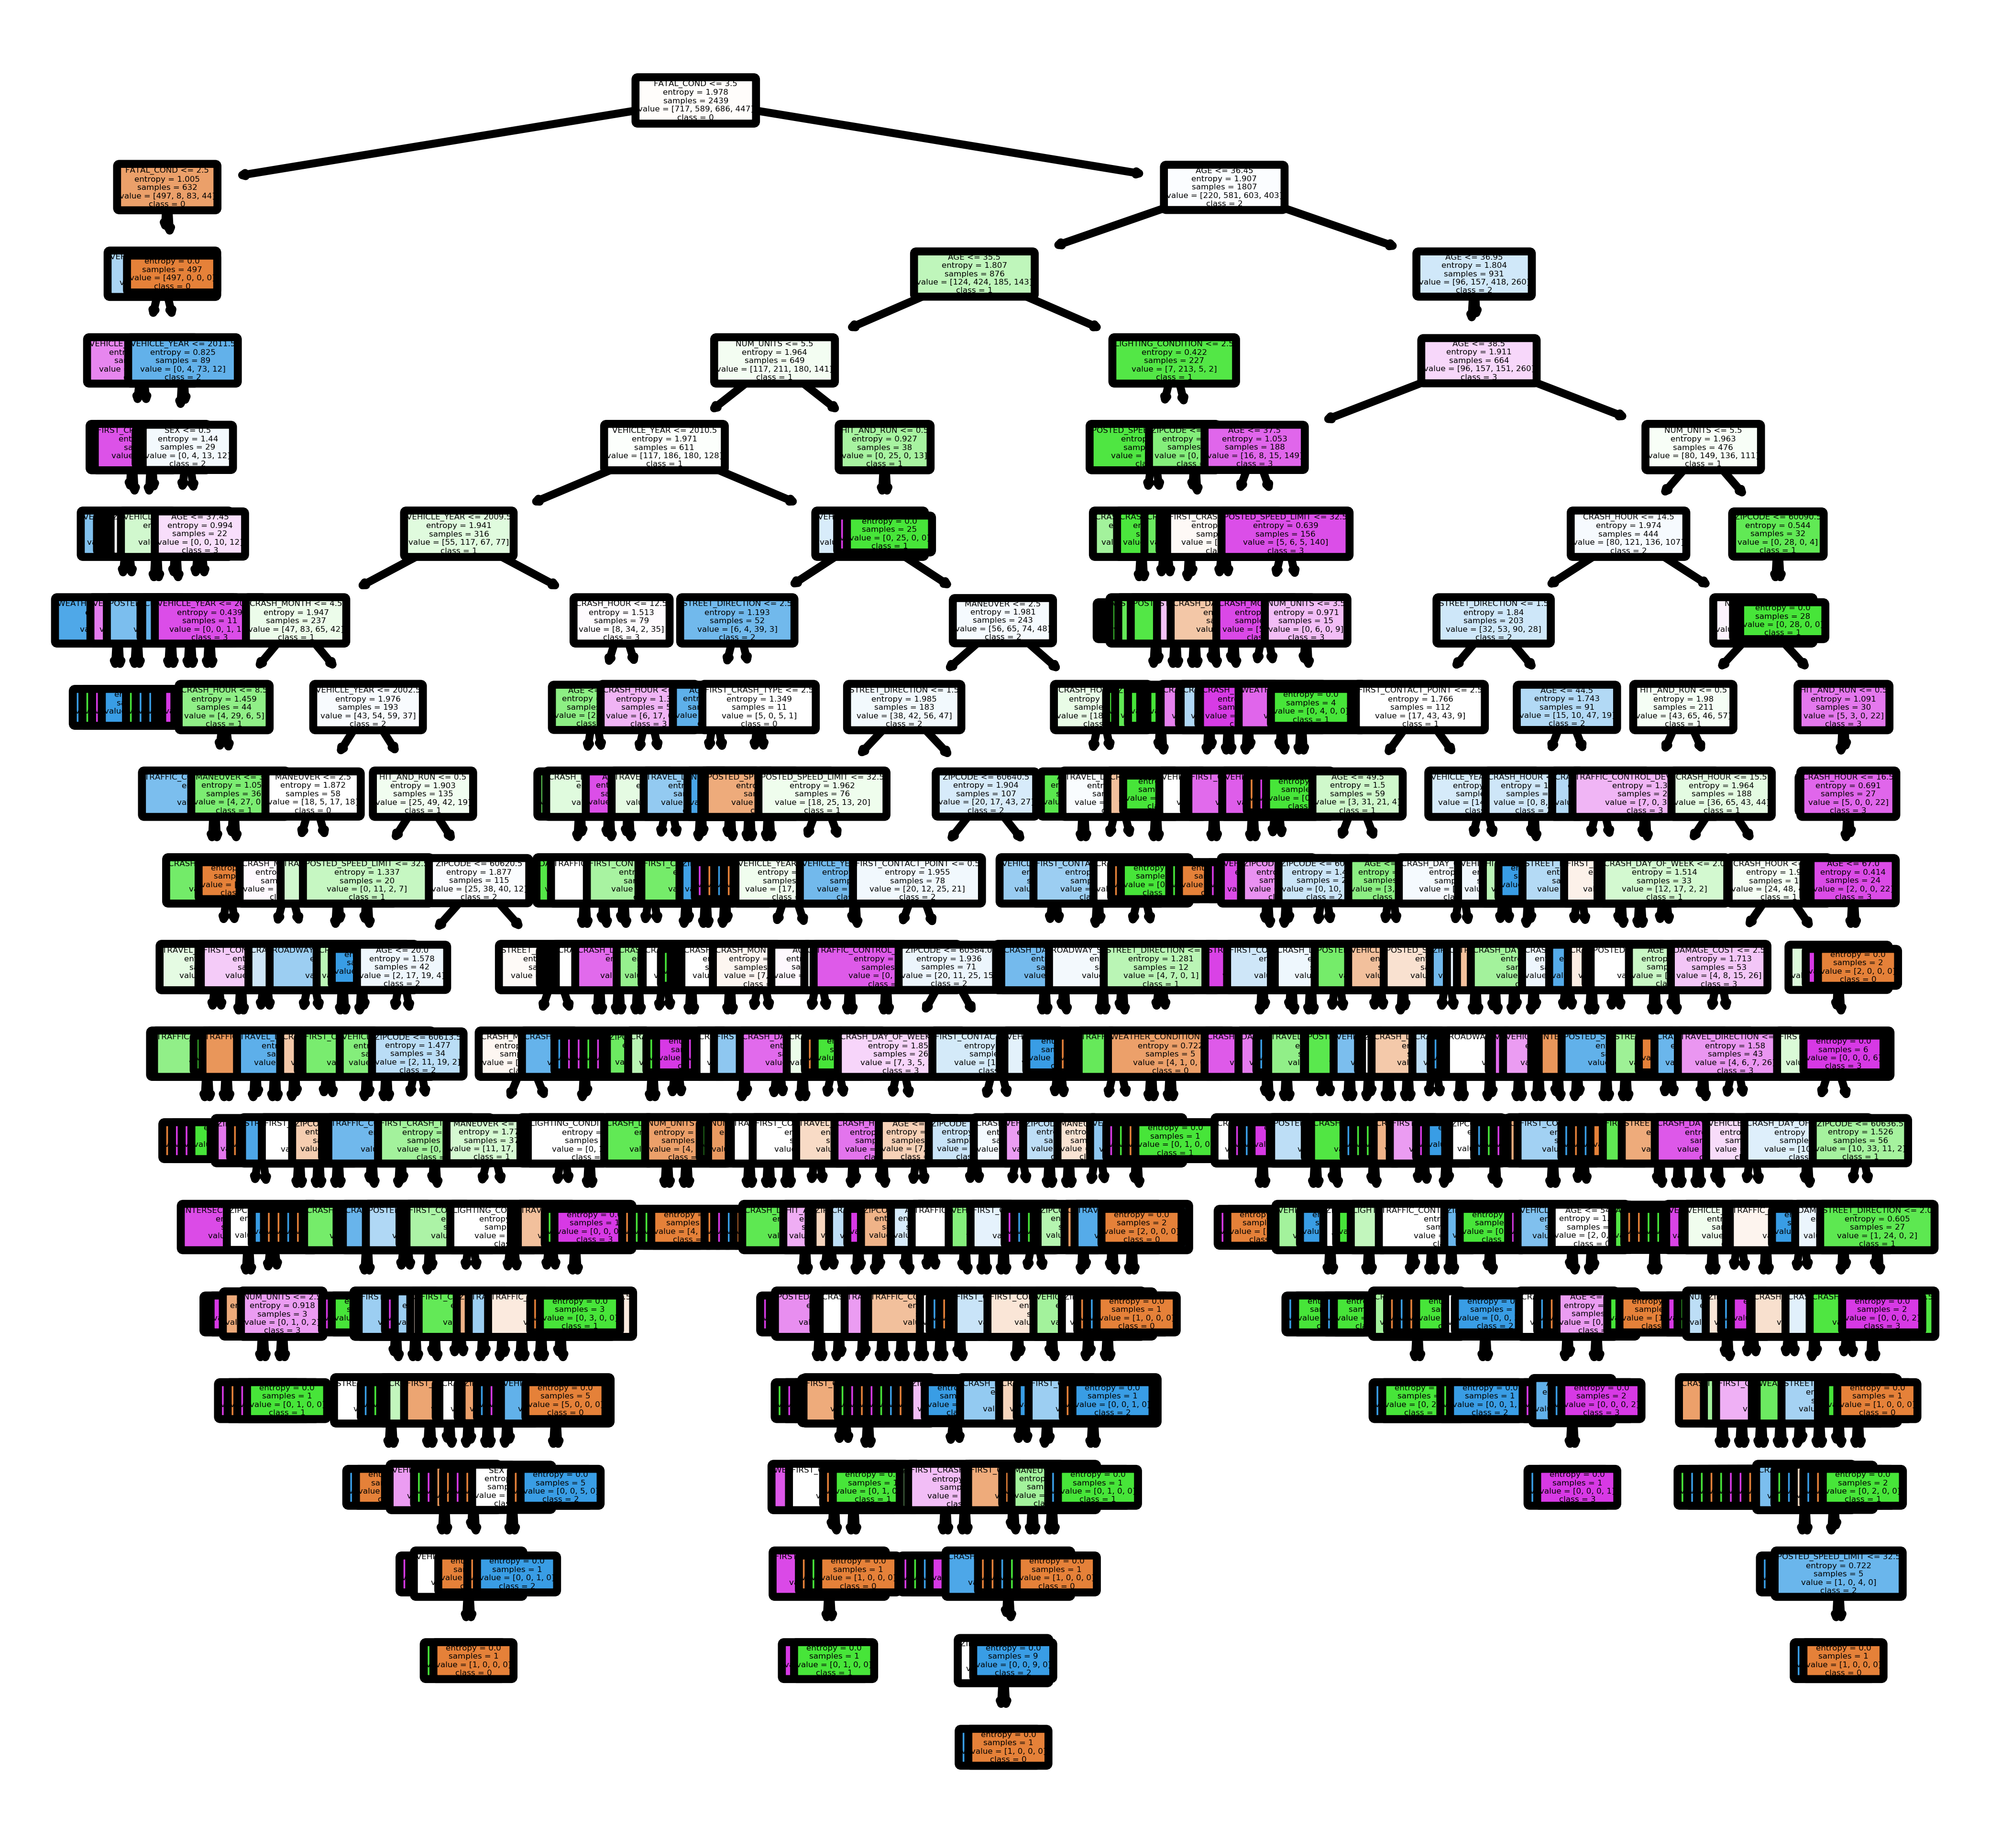

In [20]:
plt.figure(figsize=(4,4), dpi=1200)
tree.plot_tree(dt, feature_names=X.columns, class_names=np.unique(y).astype('str'), filled=True, rounded=True)
plt.show()

## Check predictive performance

In [21]:
y_pred = dt.predict(X_test)
print('Accuracy: ', round(accuracy_score(y_test, y_pred)*100,2), '%')

Accuracy:  80.74 %


In [22]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,2,3,All
True,,,,,
0,96,8,6,7,117
1,4,87,4,11,106
2,9,9,104,9,131
3,1,8,7,61,77
All,110,112,121,88,431


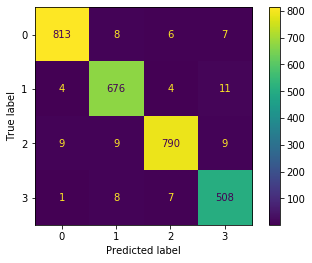

In [23]:
plot_confusion_matrix(dt, X, y, values_format='.3g')
plt.show()

In [24]:
report = classification_report(y_test, y_pred, output_dict=True)
print('\nClassification Report')
print('----------------')
clf_doc = pd.DataFrame(report).transpose()
clf_doc


Classification Report
----------------


,precision,recall,f1-score,support
0,0.872727,0.820513,0.845815,117.000000
1,0.776786,0.820755,0.798165,106.000000
2,0.859504,0.793893,0.825397,131.000000
3,0.693182,0.792208,0.739394,77.000000
accuracy,0.807425,0.807425,0.807425,0.807425
macro avg,0.800550,0.806842,0.802193,431.000000
weighted avg,0.813036,0.807425,0.808877,431.000000


In [25]:
def multiclass_roc_auc_score(truth, pred, average="macro"):
    
    lb = LabelBinarizer()
    lb.fit(truth)
    
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    
    return roc_auc_score(truth, pred, average=average)

In [26]:
multiclass_roc_auc_score(y_test, y_pred, 'weighted')

0.8727765413542159

In [27]:
Xlabel_train, Xlabel_test, ylabel_train, ylabel_test = train_test_split(X, y_label, test_size = 0.15, random_state = 42)
classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', random_state=SEED))
y_score = classifier.fit(X_train, ylabel_train).predict_proba(X_test)
print(ylabel_test)
print(y_score.shape)

[[1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 ...
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]]
(431, 4)


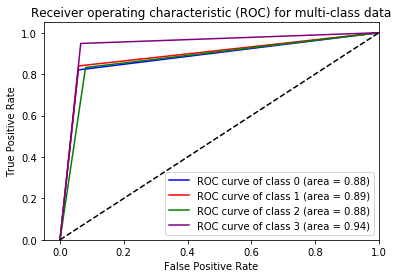

In [28]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ylabel_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ['blue', 'red', 'green', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for multi-class data')
plt.legend(loc="lower right")
plt.show()